In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#from functions.diameters import spreadDiameter
from videoWriterClass import videoWriterClass

In [33]:
myWriter = videoWriterClass()

In [34]:
def diameter(frame, plotFlag, printFlag):
    '''Takes a frame and exports the center and diameters'''

    # STATES
    # + droplet (r_sd, r_bd, r_cd)
    # + transient (r_sd, r_bd)
    # + disappeared (r_sd)

    # convert to grayscale and otsu method
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    th,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # smooth image
    kernel = np.ones((10,10))
    otsu = cv2.dilate(otsu, kernel)

    # Find contours
    cnts, _ = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = np.concatenate(cnts) # Concatenate all contours -> to get the outer one

    # determine and draw bounding rectangle
    x, y, w, h = cv2.boundingRect(cnts)
    center = (int(x+w/2), int(y+h/2))
    r_sd = np.min([int(w/2),int(h/2)])

    # convert to polar coordinates
    polar_image = cv2.warpPolar(
            src=otsu,
            center=center,
            dsize=(otsu.shape[1],otsu.shape[1]),
            maxRadius=r_sd, 
            flags=cv2.WARP_FILL_OUTLIERS)

    # chnage data type and calculate mean over columns
    polar_image = np.float32(polar_image)
    p_mean = np.mean(polar_image, axis=0, dtype=np.float32)

    # core diameter
    index_core = np.where(p_mean == 255)[0]
    band_core = len(index_core)
    if band_core >= 15:
        r_cd = index_core[-1]
    else:
        r_cd = None

    # burst diameter
    index_burst= np.where(p_mean <= 20)[0]
    band_burst = len(index_burst)
    if band_burst >= 15:
        r_bd = index_burst[-1]
    else:
        r_bd = None
 
    if printFlag:
        #print(band_core)
        #print(band_burst)
        print(f"Center = {center}pix")
        print(f"Spreading Diameter = {r_sd}pix")
        print(f"Bursting Diameter = {r_bd}pix")
        print(f"Core Diameter = {r_cd}pix")
    if plotFlag:
        plt.imshow(otsu)
        plt.show()
        plt.imshow(polar_image)
        plt.show()
        plt.plot(p_mean)
        plt.xlabel('Radius')
        plt.ylabel('Pixel Value')
        plt.show()
    
    return (center, r_cd, r_bd, r_sd)

---------------------------------------
Frameindex = 0
Center = (466, 461)pix
Spreading Diameter = 175pix
Bursting Diameter = 762pix
Core Diameter = 571pix


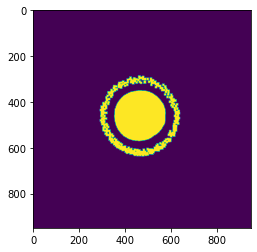

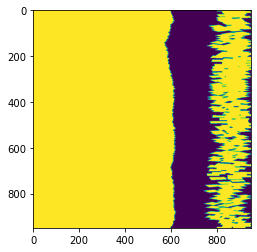

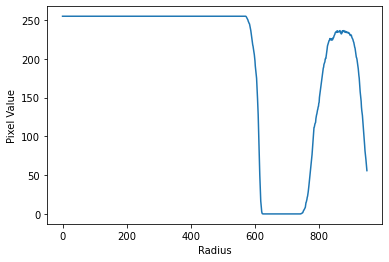

---------------------------------------
Frameindex = 50
Center = (466, 464)pix
Spreading Diameter = 281pix
Bursting Diameter = 560pix
Core Diameter = 405pix


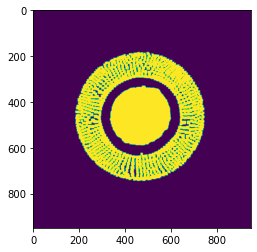

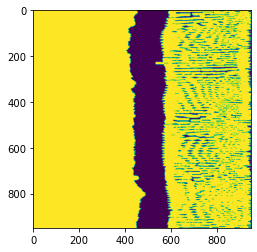

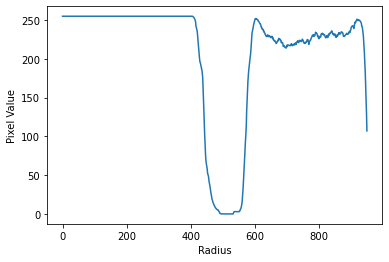

---------------------------------------
Frameindex = 100
Center = (451, 467)pix
Spreading Diameter = 331pix
Bursting Diameter = Nonepix
Core Diameter = 352pix


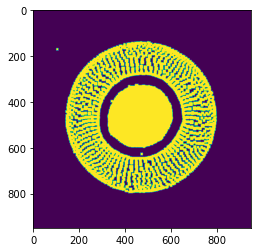

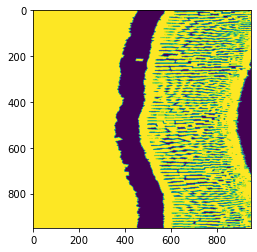

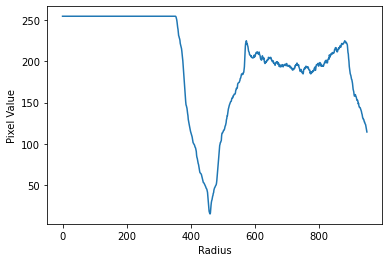

---------------------------------------
Frameindex = 150
Center = (469, 469)pix
Spreading Diameter = 369pix
Bursting Diameter = 439pix
Core Diameter = 340pix


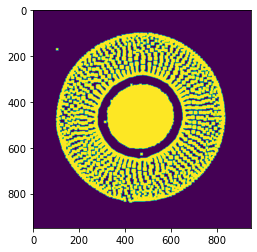

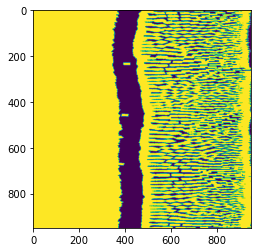

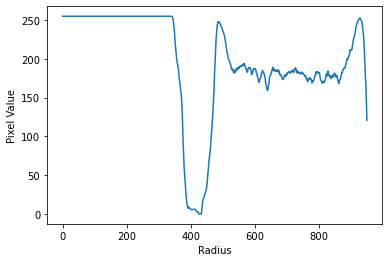

---------------------------------------
Frameindex = 200
Center = (471, 467)pix
Spreading Diameter = 399pix
Bursting Diameter = 404pix
Core Diameter = 316pix


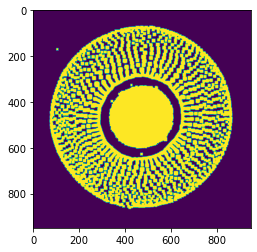

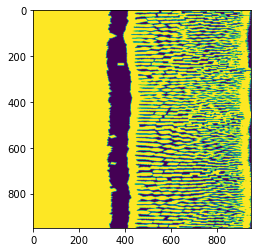

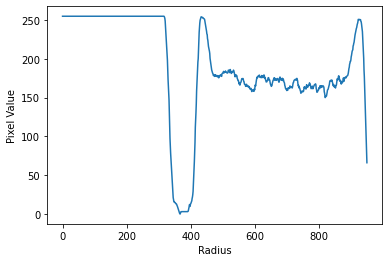

---------------------------------------
Frameindex = 250
Center = (471, 466)pix
Spreading Diameter = 421pix
Bursting Diameter = 345pix
Core Diameter = 266pix


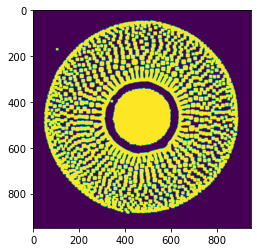

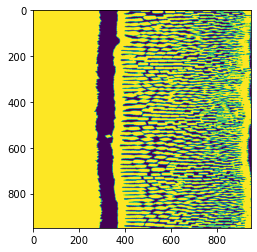

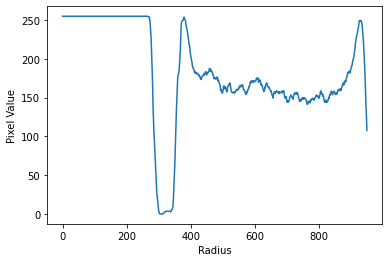

---------------------------------------
Frameindex = 300
Center = (472, 464)pix
Spreading Diameter = 438pix
Bursting Diameter = 248pix
Core Diameter = 112pix


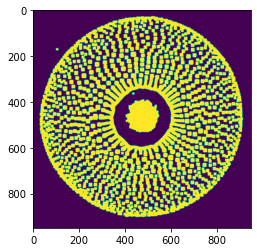

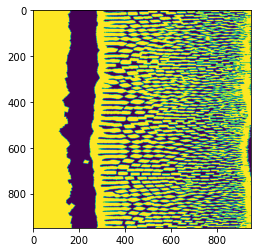

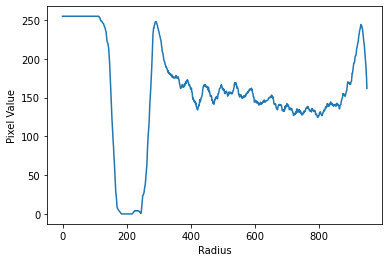

---------------------------------------
Frameindex = 350
Center = (470, 461)pix
Spreading Diameter = 450pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


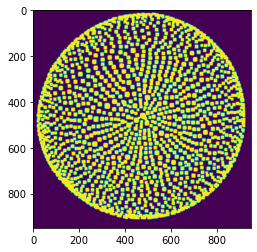

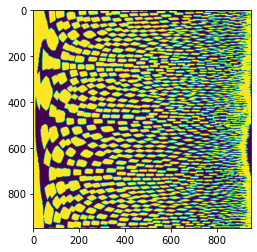

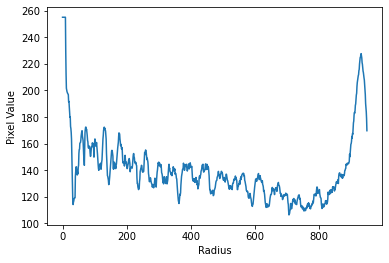

---------------------------------------
Frameindex = 400
Center = (470, 459)pix
Spreading Diameter = 459pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


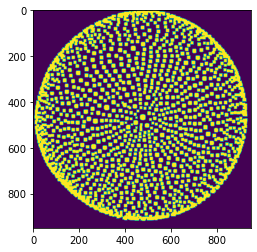

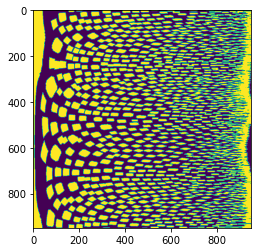

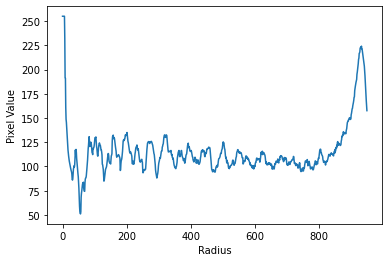

---------------------------------------
Frameindex = 450
Center = (470, 462)pix
Spreading Diameter = 462pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


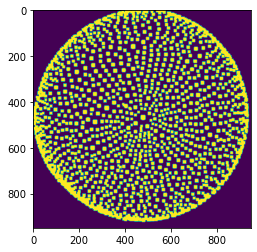

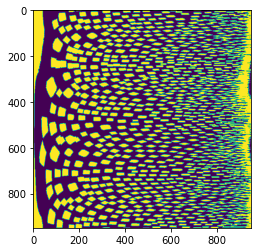

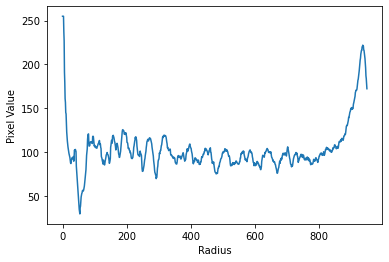

---------------------------------------
Frameindex = 500
Center = (472, 463)pix
Spreading Diameter = 463pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


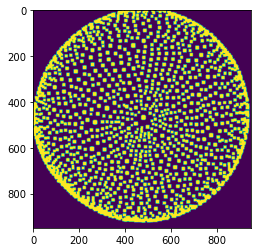

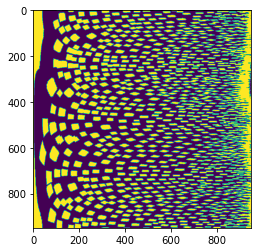

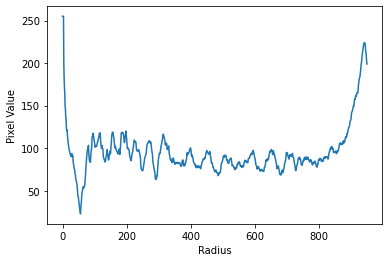

---------------------------------------
Frameindex = 550
Center = (472, 464)pix
Spreading Diameter = 464pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


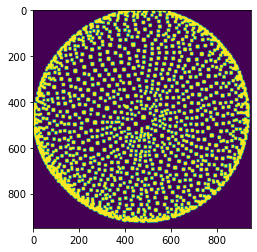

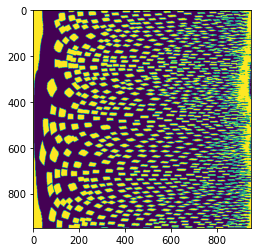

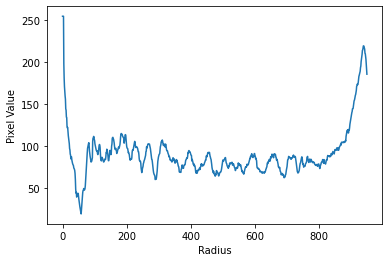

---------------------------------------
Frameindex = 600
Center = (472, 464)pix
Spreading Diameter = 464pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


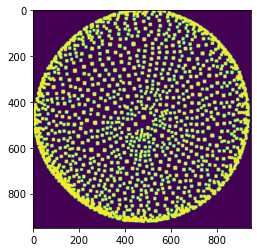

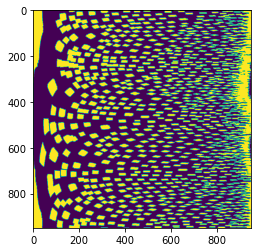

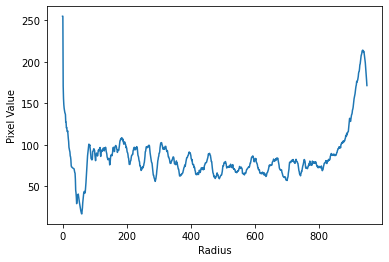

---------------------------------------
Frameindex = 650
Center = (472, 463)pix
Spreading Diameter = 463pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


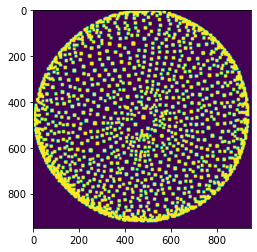

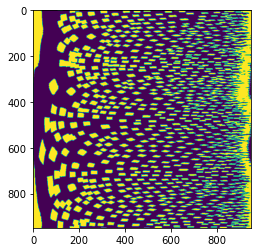

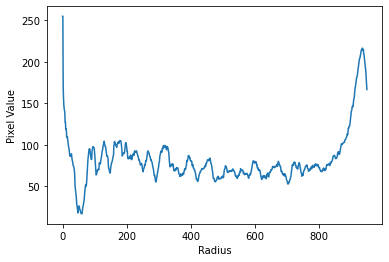

---------------------------------------
Frameindex = 700
Center = (474, 462)pix
Spreading Diameter = 462pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


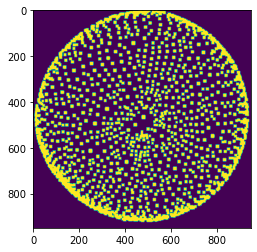

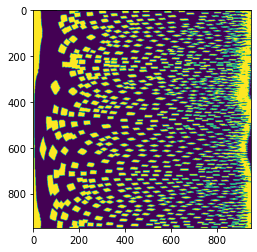

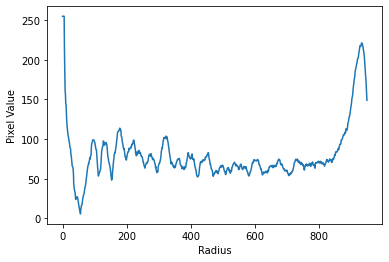

---------------------------------------
Frameindex = 750
Center = (475, 462)pix
Spreading Diameter = 460pix
Bursting Diameter = 68pix
Core Diameter = Nonepix


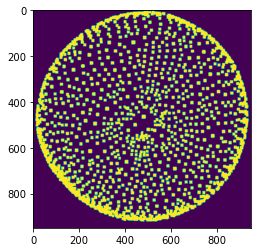

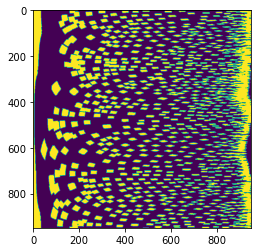

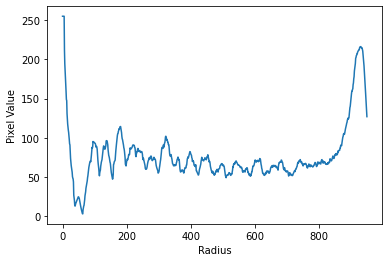

In [35]:
for i in range(0,800,50):
    print("---------------------------------------")
    print(f"Frameindex = {i}")
    frame = myWriter.getSingleImage(frameNumber=i)
    data = diameter(frame, plotFlag=True, printFlag=True)
